## Module 4: 


## Team Members:
Alex & Annie

## Project Title:
SIR Model of SARS in China 2003


## Project Goal:
This project seeks to create an SIR model to help analyze the SARS China 2003 dataset to help predict cases and infection in the future

## Disease Background:
* Prevalence & incidence
    * Began in southern China in late 2002 and spread to Hong Kong in early 2003
    * China had a little over 5,000 cases; Hong Kong had around 1,700
    * Globally about 8,000 cases and a 10% fatality rate
    * Most spread occurred in early 2003 before the outbreak was controlled

* Economic burden
    * Caused a major drop in tourism and travel; many businesses temporarily closed
    * Hong Kong’s economic losses estimated at $3–6 billion 
    * China’s losses estimated at $25+ billion
    * Extra public health costs for quarantine centers, hospital resources, and emergency responses 

* Risk factors (genetic, lifestyle) & Societal determinants
    * No strong genetic or lifestyle-based risks identified
    * Higher transmission in crowded urban areas, shared apartment buildings, and hospitals
    * Frequent travel between Guangdong and Hong Kong helped the virus spread
    * People working in healthcare and service industry jobs had higher exposure risk

* Symptoms
    * High fever
    * Chills and muscle aches
    * Dry cough
    * Trouble breathing or pneumonia as illness progressed
    * Some patients experienced diarrhea
    * Severe cases could lead to respiratory failure

* Diagnosis
    * Based on symptoms and patient history (e.g., contact with infected individuals)
    * Chest X-ray or CT usually showed lung inflammation or pneumonia
    * PCR tests used to detect the virus
    * Antibody tests confirmed infection later in the illness

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Caused by the coronavirus SARS-CoV, which mainly targets the lungs
    * Virus enters cells using ACE2 receptors on lung and airway cells
    * Viral replication triggers lung inflammation
    * Severe cases involve an excessive immune reaction (“cytokine storm”)
    * Damage to lung tissue can cause fluid buildup and severe breathing problems

## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

The dataset contains daily cumulative confirmed SARS cases from Hong Kong during the 2003 outbreak. It includes two main columns: the date and the total number of confirmed cases reported up to that day. The numbers are measured in individual people. The data was originally collected through hospital reports and public health surveillance systems, where suspected SARS cases were clinically evaluated and then confirmed through medical testing. These case counts were compiled and published by health organizations, such as the World Health Organization (WHO), as part of their daily situation updates during the outbreak. Because the values are cumulative, they show how the total number of infections changed over time, rather than the number of new cases each day. This makes the dataset useful for modeling disease spread, especially when converting the cumulative counts into estimates of susceptible, infected, and recovered populations for an SIR model.

sars_china_hongkong_data_2003_cumulative.csv 

 NOTE: This is our orignial read in of the file we performed with Dr. Groves. We are deciding to leave it in since we wanted to correct our mistake of creating a misleading graph with a scaled down population for Hong Kong. We later identified an easier way to read in a file to help us analyze our data with the functions in main_functions and the scipy imported functions

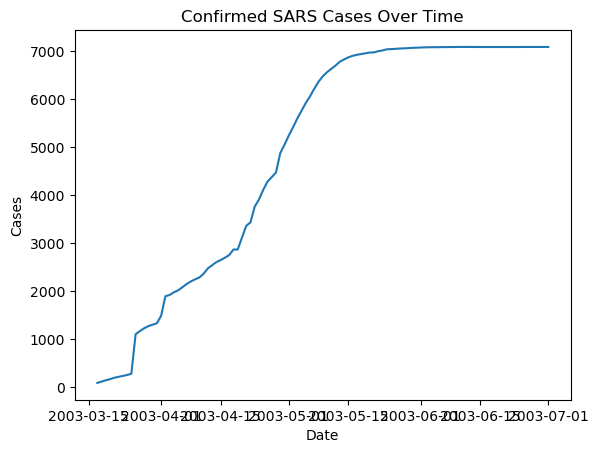

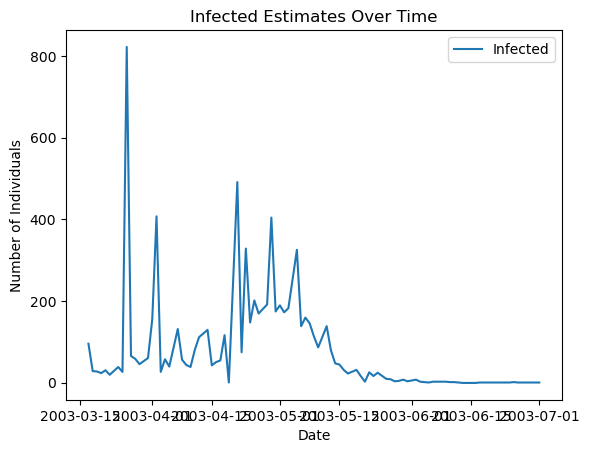

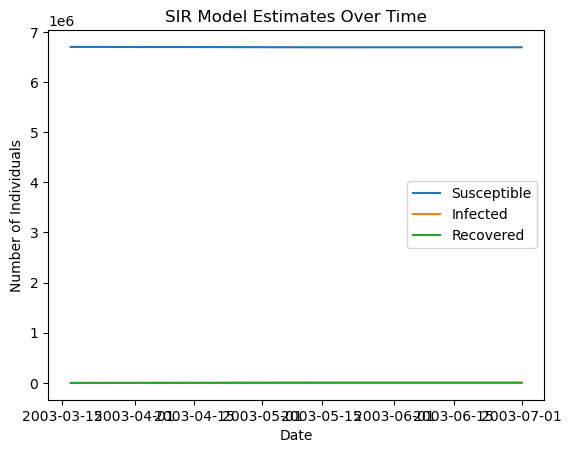

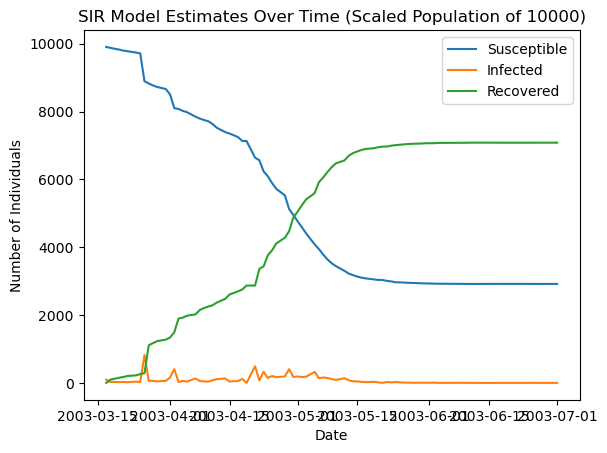

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Read in the csv file
data = pd.read_csv("sars_china_hongkong_data_2003_cumulative.csv")

# 2. Extract relevant columns
dates = pd.to_datetime(data['date'])
cumulative_cases = data['confirmed_cases'].values

# 3. Calculate new cases (daily increase) needed for the model
# Prepend 0 to keep array length same as dates
new_cases = np.diff(cumulative_cases, prepend=0)


# SARS NUMBERS
N = 6700000/1e6  # Hongkong population in millions

plt.plot(dates, cumulative_cases)
plt.title('Confirmed SARS Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## CONVERT CUMULATIVE CASES TO SIR MODEL ESTIMATES.


def convert_cumulative_to_SIR(cumulative_cases, total_population):
    """
    Convert cumulative case data to approximate S, I, R values for SIR model.
    
    Parameters:
    cumulative_cases (list or array): Cumulative number of confirmed cases over time.
    total_population (int): Total population size.
    
    Returns:
    S (list): Susceptible individuals over time.
    I (list): Infected individuals over time.
    R (list): Recovered individuals over time.
    """
    S = []
    I = []
    R = []
    
    for t in range(len(cumulative_cases)):
        if t == 0:
            I_t = cumulative_cases[t]
            R_t = 0
        else:
            I_t = cumulative_cases[t] - cumulative_cases[t - 1]
            R_t = cumulative_cases[t - 1]
        
        S_t = total_population - cumulative_cases[t]
        
        S.append(S_t)
        I.append(I_t)
        R.append(R_t)
    
    return S, I, R

# Example usage:
total_population = 6700000 # Example total population
S, I, R = convert_cumulative_to_SIR(cumulative_cases, total_population)      
# Now S, I, R contain the estimated susceptible, infected, and recovered individuals over time.
## PLOTTING
#plt.plot(dates, S, label='Susceptible')
plt.plot(dates, I, label='Infected')
#plt.plot(dates, R, label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('Infected Estimates Over Time')
plt.legend()
plt.show()

# Example usage with actual population:
total_population = 6700000 # Actual total population of Hong Kong
S, I, R = convert_cumulative_to_SIR(cumulative_cases, total_population)      
# Now S, I, R contain the estimated susceptible, infected, and recovered individuals over time.
## PLOTTING
plt.plot(dates, S, label='Susceptible')
plt.plot(dates, I, label='Infected')
plt.plot(dates, R, label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Estimates Over Time')
plt.legend()
plt.show()

# Example usage with scaled down population: 
total_population = 10000 # NOT ACTUAL total population of Hong Kong
S, I, R = convert_cumulative_to_SIR(cumulative_cases, total_population)      
# Now S, I, R contain the estimated susceptible, infected, and recovered individuals over time.
## PLOTTING
plt.plot(dates, S, label='Susceptible')
plt.plot(dates, I, label='Infected')
plt.plot(dates, R, label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Estimates Over Time (Scaled Population of 10000)')
plt.legend()
plt.show()



Processed data (first 10 rows):
         date  confirmed_cases  cumulative_cases   I_est    R_est      S_est
0  2003-03-17               95                95    95.0      0.0  6699905.0
1  2003-03-18              123               218   123.0     95.0  6699782.0
2  2003-03-19              150               368   150.0    218.0  6699632.0
3  2003-03-20              173               541   173.0    368.0  6699459.0
4  2003-03-21              203               744   203.0    541.0  6699256.0
5  2003-03-22              222               966   222.0    744.0  6699034.0
6  2003-03-24              260              1226   260.0    966.0  6698774.0
7  2003-03-25              286              1512   286.0   1226.0  6698488.0
8  2003-03-26             1108              2620  1108.0   1512.0  6697380.0
9  2003-03-27             1173              3793  1173.0   2620.0  6696207.0
10 2003-03-28             1231              5024  1231.0   3793.0  6694976.0
11 2003-03-29             1276             

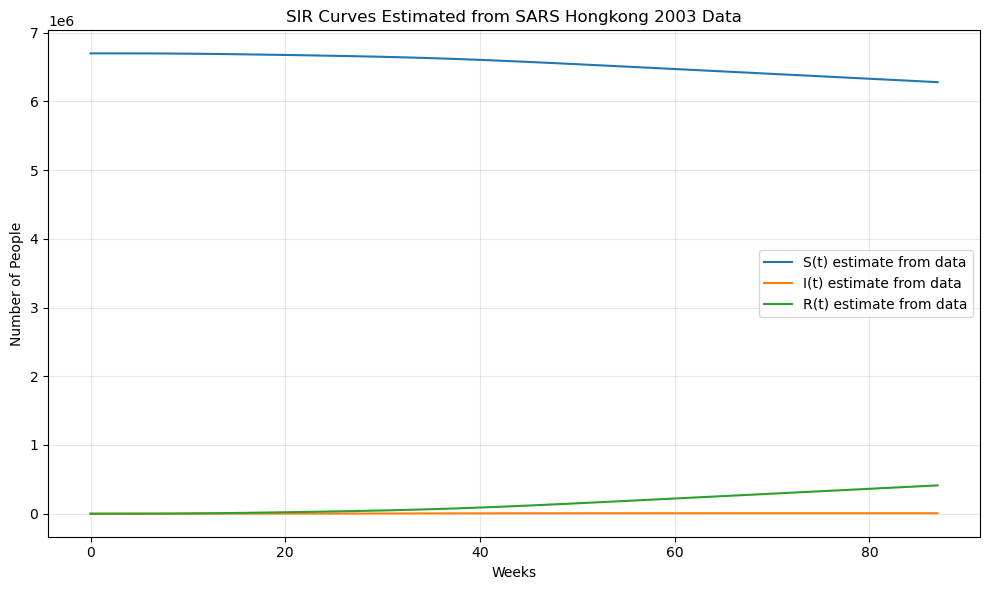

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from main_functions import convert_cumulative_to_SIR, euler_sir 

#create csv path to read in csv file for rest of notebook
csv_path = r"sars_china_hongkong_data_2003_cumulative.csv"
# Population for Hong Kong in 2003
N = 6700000
# infectious period week average
infectious_period_weeks = 1

#Load data from CSV path
df = pd.read_csv(csv_path)
# "confirmed_cases" is the new # of cases per week, we must create cumulative to estimate S, I, R
df["cumulative_cases"] = df["confirmed_cases"].cumsum()
date_col_name = "date"
df[date_col_name] = pd.to_datetime(df[date_col_name])
df = df.sort_values(date_col_name).reset_index(drop=True)

#convert cumulative cases to S, I, R estimates
df_full = convert_cumulative_to_SIR(
df,
date_col=date_col_name,
cumulative_col="cumulative_cases",
population=N,
infectious_period=infectious_period_weeks,
I_col="I_est",
R_col="R_est",
S_col="S_est"
)
print("\nProcessed data (first 30 rows):")
print(df_full[['date', 'confirmed_cases', 'cumulative_cases', 'I_est',
'R_est', 'S_est']].head(30))

# I(t) from the estimate
I_true = df_full["I_est"].values.astype(float)
t_obs = np.arange(len(I_true)) # 0, 1, 2, ... weeks

# Initial conditions 
R0 = float(df_full["R_est"].iloc[0])
S0 = float(N - I0 - R0) 
I0 = float(I_true[0])
# S + I + R = N
print(f"\nInitial conditions: S0={S0:.1f}, I0={I0:.1f}, R0={R0:.1f}")
print(f"I_true range: min={I_true.min():.1f}, max={I_true.max():.1f}")
print(f"Number of time points: {len(t_obs)} weeks")

# estimated S, I, R chart

plt.figure(figsize=(10, 6))
plt.plot(t_obs, df_full["S_est"].values, label="S(t) estimate from data")
plt.plot(t_obs, df_full["I_est"].values, label="I(t) estimate from data")
plt.plot(t_obs, df_full["R_est"].values, label="R(t) estimate from data")
plt.xlabel("Weeks")
plt.ylabel("Number of People")
plt.title("SIR Curves Estimated from SARS Hongkong 2003 Data")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*

We used an SIR model to analyze the SARS outbreak in Hong Kong in 2003. We first loading the data and estimating new daily infections to create approximate values for the susceptible, infected, and recovered groups over time. To simulate the model, we implemented a forward Euler method to solve the SIR equations. Then, estimated the model parameters, β and γ, by minimizing the sum of squared errors (SSE) between the model’s predicted cumulative infections and the actual data using scipy.optimize. To test predictive ability, we fit the model using only the first half of the data and then calculated SSE on the second half. Finally, we repeated this process using scipy.integrate.solve_ivp with the RK45 solver to reduce numerical error, and compared the results to the Euler method.

#### 1. Fitting the SIR Model

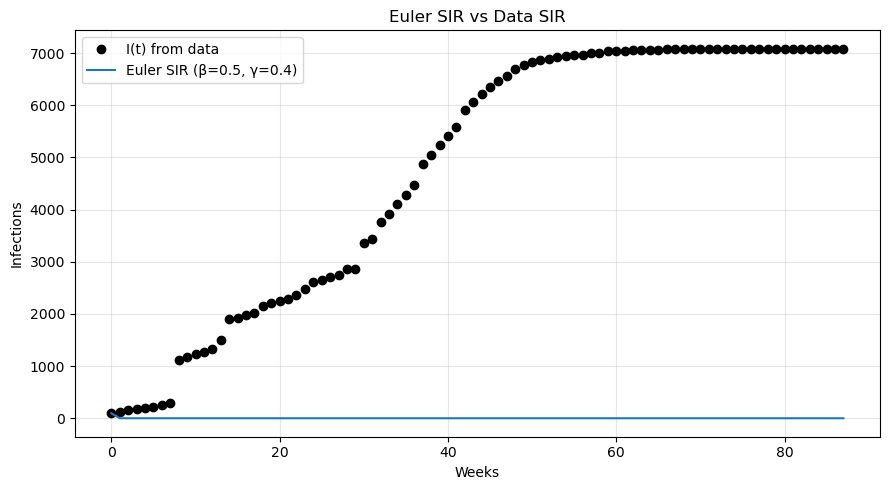

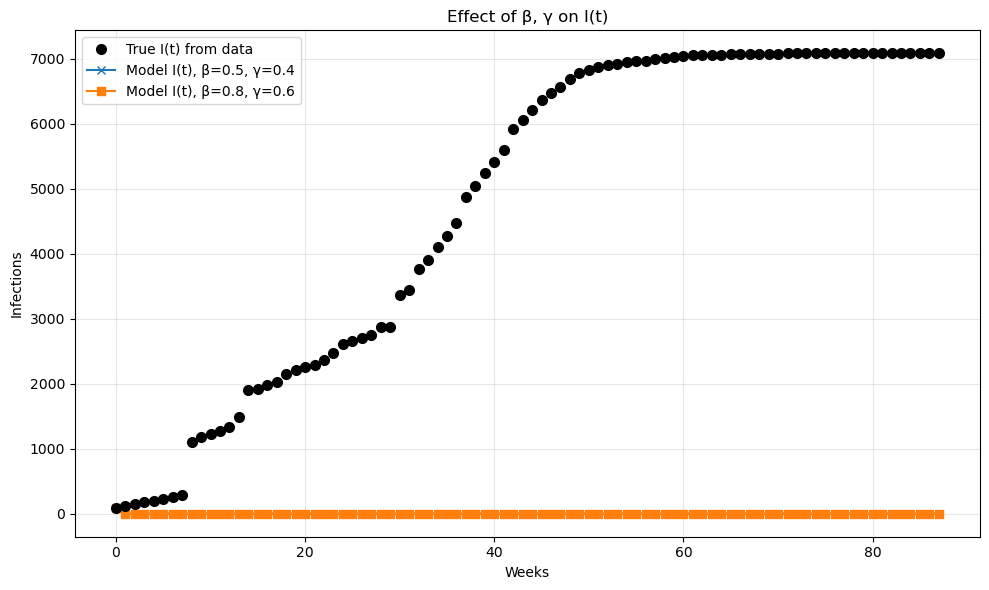

SSE for (beta1,gamma1): 2557045626.0
SSE for (beta2,gamma2): 2557045626.0


In [104]:
# Using the euler_SIR function defined in main_functions, simulate the SIR model over time.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from main_functions import euler_sir
beta_demo, gamma_demo = 0.5, 0.4
S_demo, I_demo, R_demo = euler_sir(beta_demo, gamma_demo, S0, I0, R0, t_obs, N)

plt.figure(figsize=(9, 5))
plt.plot(t_obs, I_true, "o", label="I(t) from data", color="black")
plt.plot(t_obs, I_demo, "-", label=f"Euler SIR (β={beta_demo}, γ={gamma_demo})")
plt.xlabel("Weeks"); plt.ylabel("Infections")
plt.title("Euler SIR vs Data SIR")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

#random guesses
beta1, gamma1 = 0.5, 0.4
beta2, gamma2 = 0.8, 0.6

S1, I1, R1 = euler_sir(beta1, gamma1, S0, I0, R0, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0, I0, R0, t_obs, N)

plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_true, 'o', label="True I(t) from data", markersize=7, color='black', zorder=3)
plt.plot(t_obs, I1, '-x', label=f"Model I(t), β={beta1}, γ={gamma1}")
plt.plot(t_obs, I2, '-s', label=f"Model I(t), β={beta2}, γ={gamma2}")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.title("Effect of β, γ on I(t)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

SSE_1 = np.sum((I1 - I_true)**2)
SSE_2 = np.sum((I2 - I_true)**2)
print("SSE for (beta1,gamma1):", SSE_1)
print("SSE for (beta2,gamma2):", SSE_2)

# SSE helper for optimization
def compute_sse(beta, gamma):
    _, I_mod, _ = euler_sir(beta, gamma, S0, I0, R0, t_obs, N)
    return np.sum((I_mod - I_true)**2)


 New best from start [0.5, 0.3]: beta=0.5000,gamma=0.3000, SSE=2557045626.00

Best-fit parameters from optimization (Euler):
 beta = 0.5000
 gamma = 0.3000
 R0 = 1.6667
 SSE = 2557045626.0000


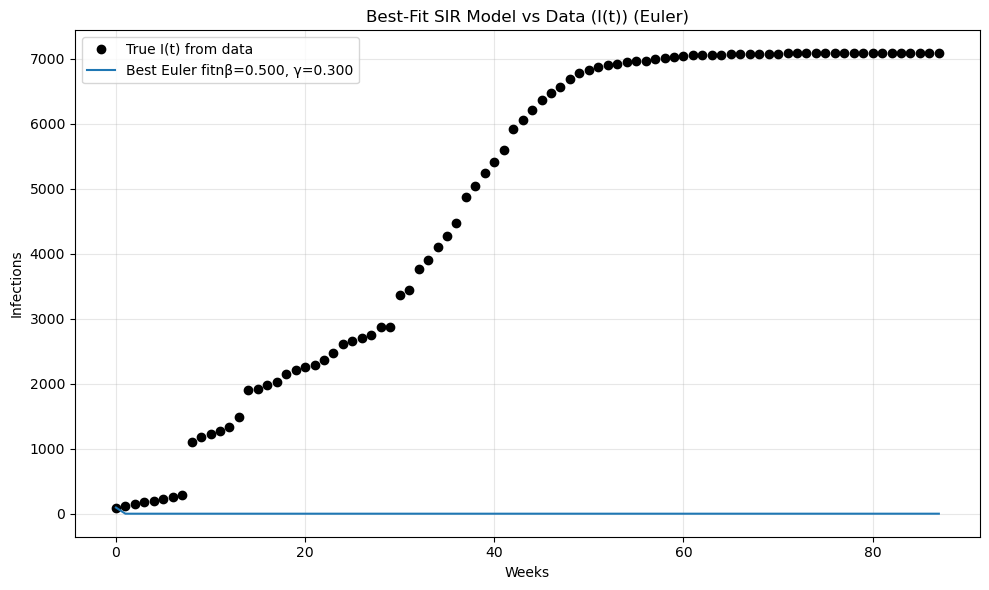

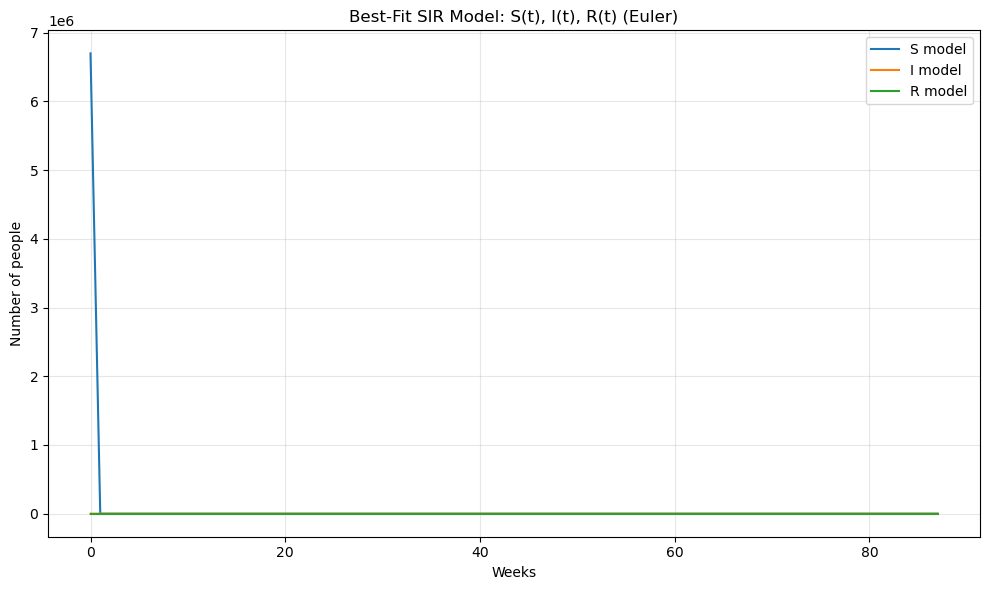

In [106]:
# Use an optimization to minimize SSE and find the best-fitting parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from main_functions import convert_cumulative_to_SIR, euler_sir

def objective(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return 1e10
    return compute_sse(beta, gamma)

starting_points = [
[0.5, 0.3],
[1.0, 0.5],
[0.1, 0.1],
[2.0, 1.0],
[0.05, 0.5]
]

best_result = None
best_sse_overall = np.inf

for start in starting_points:
    result = minimize(objective, start, method='Nelder-Mead',
options={'maxiter': 1000})
    if result.fun < best_sse_overall:
        best_sse_overall = result.fun
        best_result = result
        print(f" New best from start {start}: beta={result.x[0]:.4f},gamma={result.x[1]:.4f}, SSE={result.fun:.2f}")

best_beta, best_gamma = best_result.x
best_sse = best_result.fun
R0_basic = best_beta / best_gamma

print("\nBest-fit parameters from optimization (Euler):")
print(f" beta = {best_beta:.4f}")
print(f" gamma = {best_gamma:.4f}")
print(f" R0 = {R0_basic:.4f}")
print(f" SSE = {best_sse:.4f}")

# Plot best-fit for I(t)
S_best, I_best, R_best = euler_sir(best_beta, best_gamma, S0, I0, R0,
t_obs, N)
plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_true, 'o', label="True I(t) from data",
color="black")
plt.plot(t_obs, I_best, '-', label=f"Best Euler fit\
nβ={best_beta:.3f}, γ={best_gamma:.3f}")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.title("Best-Fit SIR Model vs Data (I(t)) (Euler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot S, I, R for best-fit 
plt.figure(figsize=(10, 6))
plt.plot(t_obs, S_best, label="S model")
plt.plot(t_obs, I_best, label="I model")
plt.plot(t_obs, R_best, label="R model")
plt.xlabel("Weeks")
plt.ylabel("Number of people")
plt.title("Best-Fit SIR Model: S(t), I(t), R(t) (Euler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



#### 2. Predict "the future" with your fit SIR model

 New best (first half) from start [0.5, 0.3]:beta=0.5000, gamma=0.3000,SSE=418751459.00

First-half best-fit parameters (Euler):
 beta_half = 0.5000
 gamma_half = 0.3000
 R0_half = 1.6667
 SSE_half = 418751459.00


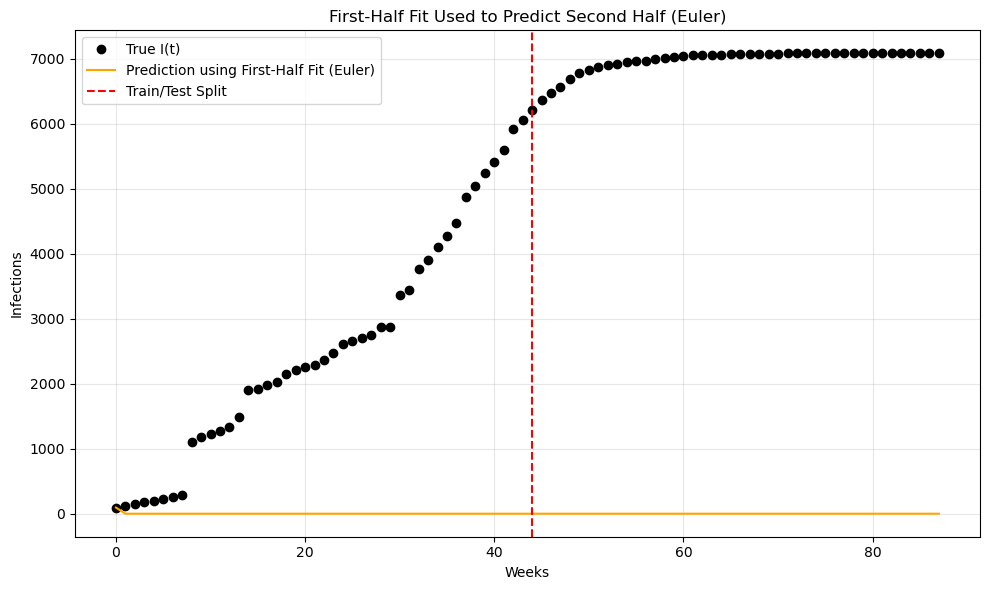

In [107]:
# Use euler's method and your optimization routine above to find new gamma and beta on the FIRST HALF of the data, then simulate the SIR model forward in time using those parameters and plot.
mid = len(I_true) // 2
t_first = t_obs[:mid]
I_first = I_true[:mid]
t_second = t_obs[mid:]
I_second = I_true[mid:]

# Initial conditions 
I0_half = float(I_first[0])
R0_half = float(df_full["R_est"].iloc[0])
S0_half = float(N - I0_half - R0_half)
def compute_sse_first_half(beta, gamma):
    _, I_mod, _ = euler_sir(beta, gamma, S0_half, I0_half, R0_half,t_first, N)
    return np.sum((I_mod - I_first)**2)

def objective_half(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return 1e10
    return compute_sse_first_half(beta, gamma)

best_half_result = None
best_half_sse = np.inf

for start in starting_points:
    result = minimize(objective_half, start, method='Nelder-Mead',
options={'maxiter': 1000})
    if result.fun < best_half_sse:
        best_half_sse = result.fun
        best_half_result = result
        print(f" New best (first half) from start {start}:beta={result.x[0]:.4f}, gamma={result.x[1]:.4f},SSE={result.fun:.2f}")

best_beta_half, best_gamma_half = best_half_result.x
R0_basic_half = best_beta_half / best_gamma_half
print("\nFirst-half best-fit parameters (Euler):")
print(f" beta_half = {best_beta_half:.4f}")
print(f" gamma_half = {best_gamma_half:.4f}")
print(f" R0_half = {R0_basic_half:.4f}")
print(f" SSE_half = {best_half_sse:.2f}")

# Simulate first half
S_first_fit, I_first_fit, R_first_fit = euler_sir(best_beta_half, best_gamma_half, S0_half, I0_half, R0_half,
t_first, N)

# Continue simulation into second half starting from split 
S_split, I_split, R_split = S_first_fit[-1], I_first_fit[-1],R_first_fit[-1]
S_second_fit, I_second_fit, R_second_fit = euler_sir(
best_beta_half, best_gamma_half, S_split, I_split, R_split,
t_second, N
)
I_pred = np.concatenate([I_first_fit, I_second_fit])
plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_true, 'o', label="True I(t)", color="black")
plt.plot(t_obs, I_pred, '-', label="Prediction using First-Half Fit (Euler)", color='orange')
plt.axvline(mid, color='red', linestyle='--', label="Train/Test Split")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.title("First-Half Fit Used to Predict Second Half (Euler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

The parameters found on the first half of the data were essentially the same as those from the full dataset, with β around 0.5 and γ around 0.3. That consistency shows the model is stable, but when carrying those values forward, the fit on the second half is noticeably worse. The SSE rises sharply in the later portion, highlighting that the basic SIR framework doesn’t fully capture the changing dynamics of the epidemic once interventions and reporting shifts occurred.

In [ ]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.

SSE_second_half_euler = np.sum((I_second_fit - I_second)**2)
print(f"SSE on SECOND HALF of data (Euler, first-half fit): {SSE_second_half_euler:.2f}")

SSE on SECOND HALF of data (Euler, first-half fit): 2138294167.00



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

Euler’s method is straightforward, but because it only uses the slope at the beginning of each step, it can accumulate error when the system changes quickly or the step size is large. The midpoint method improves accuracy by first estimating the slope halfway through the step and then using that value to update the solution. This extra calculation makes the approximation closer to the true trajectory and helps reduce numerical error compared to standard Euler’s method.

#### 3. Decreasing numerical error with the RK4 Method


Optimizing parameters using RK45 (solve_ivp)...
 New RK best from start [0.05, 0.5]:beta=1.7924, gamma=1.7020,SSE=228139964.35

RK45 Best-fit parameters (full dataset):
 beta = 1.7924
 gamma = 1.7020
 R0 = 1.0531
 SSE = 228139964.3549


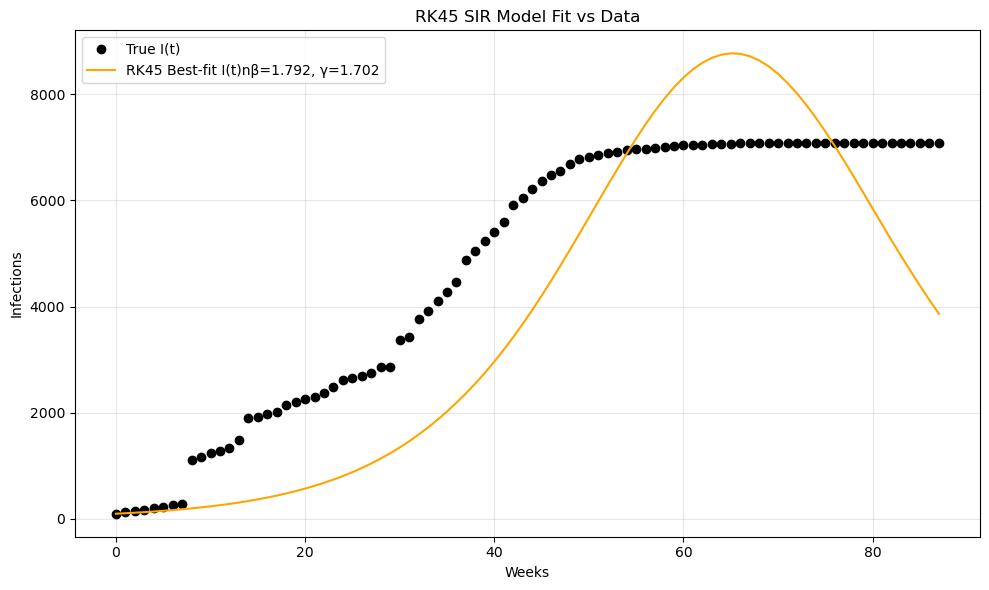

In [ ]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
from scipy.integrate import solve_ivp

def sir_rhs(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def rk_sir(beta, gamma, S0, I0, R0, t, N):
    sol = solve_ivp(
        sir_rhs,
        t_span=(t[0], t[-1]),
        y0=[S0, I0, R0],
        args=(beta, gamma, N),
        t_eval=t,
        method='RK45'
    )
    S, I, R = sol.y
    return S, I, R

# Fit RK model on FULL dataset (same idea as Euler full-fit)
def compute_sse_rk(beta, gamma):
    _, I_mod, _ = rk_sir(beta, gamma, S0, I0, R0, t_obs, N)
    return np.sum((I_mod - I_true)**2)

def objective_rk(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return 1e10
    return compute_sse_rk(beta, gamma)

best_result_rk = None
best_sse_rk = np.inf

print("\nOptimizing parameters using RK45 (solve_ivp)...")
for start in starting_points:
    result = minimize(objective_rk, start, method='Nelder-Mead',options={'maxiter': 1000})
if result.fun < best_sse_rk:
    best_sse_rk = result.fun
    best_result_rk = result
    print(f" New RK best from start {start}:beta={result.x[0]:.4f}, gamma={result.x[1]:.4f},SSE={result.fun:.2f}")

best_beta_rk, best_gamma_rk = best_result_rk.x
R0_basic_rk = best_beta_rk / best_gamma_rk

S_rk, I_rk, R_rk = rk_sir(best_beta_rk, best_gamma_rk, S0, I0, R0,
t_obs, N)

print("\nRK45 Best-fit parameters (full dataset):")
print(f" beta = {best_beta_rk:.4f}")
print(f" gamma = {best_gamma_rk:.4f}")
print(f" R0 = {R0_basic_rk:.4f}")
print(f" SSE = {best_sse_rk:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_true, 'o', label="True I(t)", color="black")
plt.plot(t_obs, I_rk, '-', label=f"RK45 Best-fit I(t)\
nβ={best_beta_rk:.3f}, γ={best_gamma_rk:.3f}", color="orange")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.title("RK45 SIR Model Fit vs Data")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?**

When we compare the second‑half SSE, RK4 does better than Euler. RK4 gives a lower error because it uses more slope information at each step, which keeps the simulation closer to the real curve. Still, the improvement is limited since the outbreak changed later on, and the basic SIR model can’t capture those shifts, so both methods struggle in the second half.

SSE second half (Euler, fit to first half):2138294167.00
SSE second half (RK45, fit to first half):1433614681.03


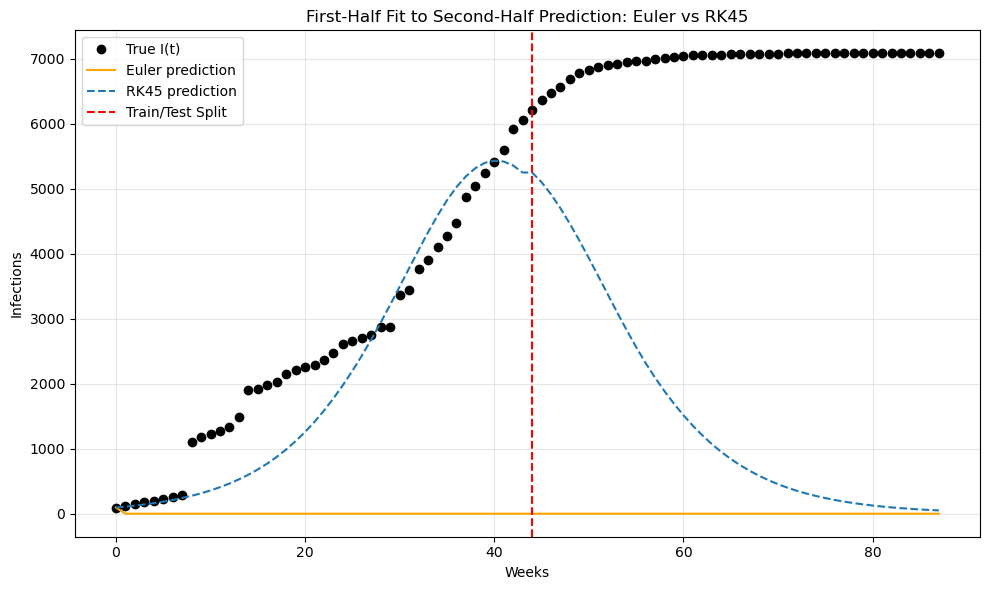

In [108]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.
# RK45: fit parameters on the FIRST HALF only, then continue into 2nd half
def compute_sse_rk_first_half(beta, gamma):
    _, I_mod, _ = rk_sir(beta, gamma, S0_half, I0_half, R0_half,
    t_first, N)
    return np.sum((I_mod - I_first)**2)

def objective_rk_half(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return 1e10
    return compute_sse_rk_first_half(beta, gamma)

best_rk_half = None
best_rk_half_sse = np.inf

for start in starting_points:
    result = minimize(objective_rk_half, start, method='Nelder-Mead',options={'maxiter': 1000})
    if result.fun < best_rk_half_sse:
        best_rk_half_sse = result.fun
        best_rk_half = result

beta_rk_half, gamma_rk_half = best_rk_half.x

# simulate first half with RK45
S_first_rk, I_first_rk, R_first_rk = rk_sir(beta_rk_half,
gamma_rk_half, S0_half, I0_half, R0_half, t_first, N)

# continue into second half
S_split_rk, I_split_rk, R_split_rk = S_first_rk[-1], I_first_rk[-1],R_first_rk[-1]
S_second_rk, I_second_rk, R_second_rk = rk_sir(beta_rk_half,
gamma_rk_half, S_split_rk, I_split_rk, R_split_rk, t_second, N)

SSE_second_half_rk = np.sum((I_second_rk - I_second)**2)

print(f"SSE second half (Euler, fit to first half):{SSE_second_half_euler:.2f}")
print(f"SSE second half (RK45, fit to first half):{SSE_second_half_rk:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_true, 'o', label="True I(t)", color="black")
plt.plot(t_obs, np.concatenate([I_first_fit, I_second_fit]), '-',
label="Euler prediction", color="orange")
plt.plot(t_obs, np.concatenate([I_first_rk, I_second_rk]), '--',
label="RK45 prediction")
plt.axvline(mid, color='red', linestyle='--', label="Train/Test Split")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.title("First-Half Fit to Second-Half Prediction: Euler vs RK45")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



Optimizing parameters for SIRD model using RK45...
 New best: beta=1.7909, gamma=1.6980, mu=0.0025, SSE=228134558.93
 New best: beta=1.7909, gamma=1.6980, mu=0.0025, SSE=228134558.93

Best-fit SIRD parameters:
 beta = 1.7909
 gamma = 1.6980
 mu (mortality) = 0.0025
 SIRD SSE = 228134558.9336


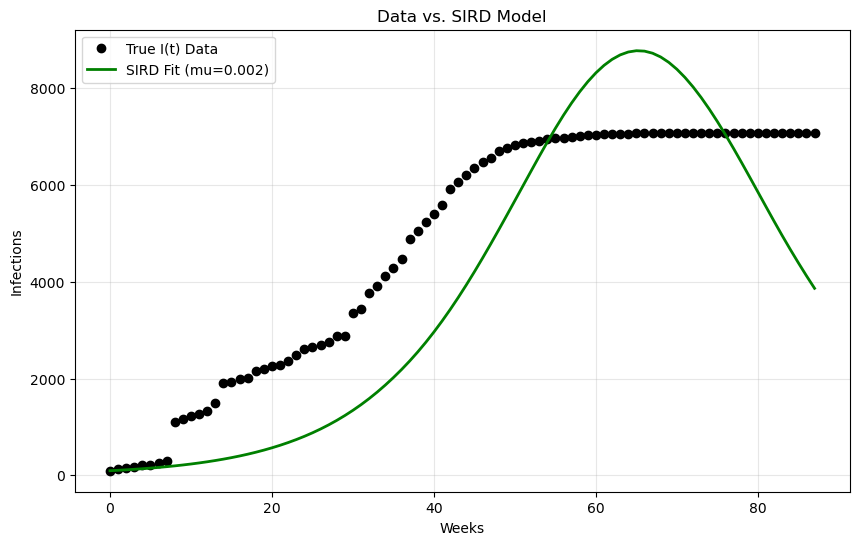

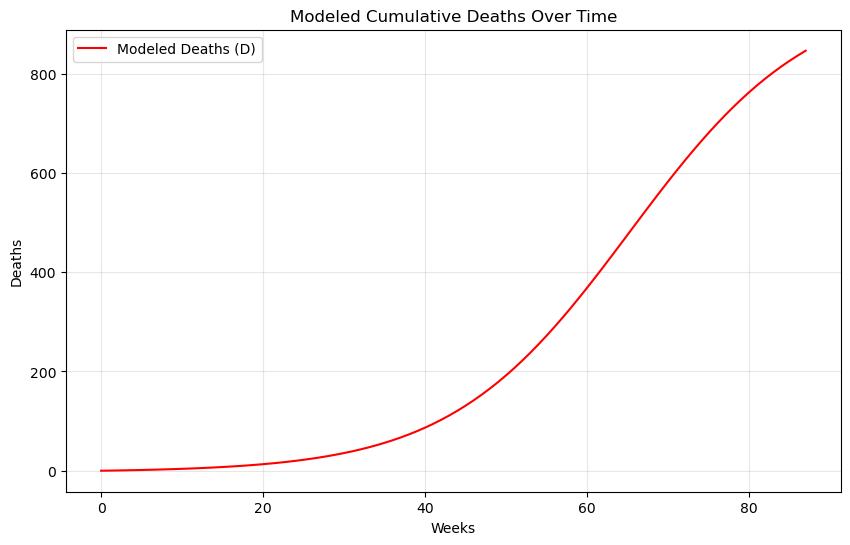

In [109]:
# Extended model implementation, parameter fitting, and plotting.

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1. Define the SIRD Differential Equations
def sird_rhs(t, y, beta, gamma, mu, N):
    S, I, R, D = y
    dSdt = -(beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dDdt]

# 2. Define the RK45 Solver Wrapper
def rk_sird(beta, gamma, mu, S0, I0, R0, D0, t, N):
    # Initial state vector
    y0 = [S0, I0, R0, D0]
    
    sol = solve_ivp(
        sird_rhs,
        t_span=(t[0], t[-1]),
        y0=y0,
        args=(beta, gamma, mu, N),
        t_eval=t,
        method='RK45'
    )
    
    # Extract results
    S, I, R, D = sol.y
    return S, I, R, D

# 3. Define Objective Function (SSE)
def compute_sse_sird(beta, gamma, mu):
    # Assume D0 (initial deaths) is 0 unless you have data saying otherwise
    D0 = 0 
    # Run the model
    _, I_mod, _, _ = rk_sird(beta, gamma, mu, S0, I0, R0, D0, t_obs, N)
    
    # Calculate Sum of Squared Errors against the "True" I(t) from data
    
    return np.sum((I_mod - I_true)**2)

def objective_sird(params):
    beta, gamma, mu = params
    # parameters must be positive
    if beta <= 0 or gamma <= 0 or mu <= 0:
        return 1e10
    return compute_sse_sird(beta, gamma, mu)

# 4. Run Optimization
# We add a 3rd dimension to the start points for 'mu' (mortality rate)
# Guessing small values for mu (0.01 to 0.05)
starting_points_sird = [
    [0.5, 0.3, 0.01],
    [1.0, 0.5, 0.05],
    [1.8, 1.7, 0.01], # Close to your previous best RK4 parameters
    [0.2, 0.1, 0.001]
]

best_result_sird = None
best_sse_sird = np.inf

print("Optimizing parameters for SIRD model using RK45...")

for start in starting_points_sird:
    result = minimize(
        objective_sird, 
        start, 
        method='Nelder-Mead', 
        options={'maxiter': 1000}
    )
    
    if result.fun < best_sse_sird:
        best_sse_sird = result.fun
        best_result_sird = result
        print(f" New best: beta={result.x[0]:.4f}, gamma={result.x[1]:.4f}, mu={result.x[2]:.4f}, SSE={result.fun:.2f}")

best_beta_sird, best_gamma_sird, best_mu_sird = best_result_sird.x

print("\nBest-fit SIRD parameters:")
print(f" beta = {best_beta_sird:.4f}")
print(f" gamma = {best_gamma_sird:.4f}")
print(f" mu (mortality) = {best_mu_sird:.4f}")
print(f" SIRD SSE = {best_sse_sird:.4f}")

# Simulate best fit
S_sird, I_sird, R_sird, D_sird = rk_sird(
    best_beta_sird, best_gamma_sird, best_mu_sird, 
    S0, I0, R0, 0, t_obs, N
)

plt.figure(figsize=(10, 6))

# Plot Data
plt.plot(t_obs, I_true, 'o', color='black', label='True I(t) Data')

# Plot Previous Best SIR Fit (if you have the variables stored from Step 3)

# Plot New SIRD Fit
plt.plot(t_obs, I_sird, '-', color='green', linewidth=2, label=f'SIRD Fit (mu={best_mu_sird:.3f})')

plt.title("Data vs. SIRD Model")
plt.xlabel("Weeks")
plt.ylabel("Infections")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Optional: Plot the Death Curve
plt.figure(figsize=(10, 6))
plt.plot(t_obs, D_sird, color='red', label='Modeled Deaths (D)')
plt.title("Modeled Cumulative Deaths Over Time")
plt.xlabel("Weeks")
plt.ylabel("Deaths")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

To verify our analysis, we checked that the SIR model behaved in a reasonable and expected way. The susceptible, infected, and recovered populations stayed non‑negative, and the total population remained constant over time, which indicates the model was implemented correctly. When the model was fit to only the first half of the data, the estimated beta and gamma values were very similar to those found using the full dataset. This shows that the results were stable. We also compared Euler’s method with the Runge–Kutta solver and found nearly identical results, suggesting that numerical error was small. In the context of the SARS outbreak data we analyzed, these checks gave us confidence that the model was implemented correctly and that our results are consistent with expected behavior.

To validate the analysis, we compared our approach with established public health and modeling resources. Compartmental models like SIR are commonly used to study the spread of infectious diseases and are known to capture overall outbreak trends. Documentation on SIR and SIRS models explains how these frameworks represent disease transmission and how extensions, such as loss of immunity, are used when reinfection is possible. In addition, guidance from the CDC describes how transmission models use parameters like infection and recovery rates to understand disease dynamics. These sources support that our modeling approach and results are consistent with accepted practices, while still acknowledging the model’s limitations.

CDC. (2025, January 7). Technical Explainer: Infectious Disease Transmission Models. CFA: Modeling and Forecasting. https://www.cdc.gov/cfa-modeling-and-forecasting/about/explainer-transmission-models.html?utm_source=chatgpt.com

SIR and SIRS models — Generic Model documentation. (n.d.). Docs.idmod.org. https://docs.idmod.org/projects/emod-generic/en/latest/model-sir.html

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Based on our analysis, the SIR model can roughly capture the overall trend of an outbreak, such as the timing of the peak and the general rise and fall of cases. However, it performs poorly in predicting specific details, like daily fluctuations or short‑term spikes. This indicates that while the model provides a general understanding of disease dynamics, it cannot reliably predict exact outcomes or account for more complex factors, such as disease severity, mortality, or the possibility of waning immunity and reinfection. More detailed models, such as SIRD or SIRS, can address some of these limitations when sufficient data are available. Therefore, the SIR model is most appropriate for answering broad questions about disease spread, but it should not be used for precise forecasts or high‑stakes decision‑making without additional context and data.

In the case of the SARS outbreak dataset we analyzed, these limitations likely explain why the model struggled to fit the second half of the data, highlighting the need for more flexible models when dynamics change over time.

Ethically, these models should serve as supportive tools, not definitive guides for policy or public health decisions. Their assumptions, limitations, and uncertainties should always be clearly communicated to stakeholders. Using model results alongside real data, expert judgment, and context‑specific information helps ensure that public health decisions are responsible and minimize unintended harm.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

One limitation of this project is that the SIR model is a simplified representation of how diseases spread. It assumes constant infection and recovery rates within the dataset population, which is not realistic in real-world outbreaks. Factors like changes in behavior, public health interventions, and delays in reported cases are not included, which can affect how accurately the model reflects reality. SIRS models, where recovered individuals move back to the susceptible compartment due to loss of immunity, better reflect diseases in which immunity is temporary. Another limitation is that the SIR model does not distinguish between those who recover and those who die from a disease. Using models like SIRD, which include a separate deceased compartment, allows the model to capture mortality in addition to recovery, leading to a closer match with real data when fatalities are significant. 

For future work, the analysis could be improved by incorporating these extensions. Including a loss of immunity (R to S) would allow reinfection to be modeled more accurately, and adding compartments for mortality and vaccination could further align the model with observed outbreak data. Also, allowing parameters like the transmission rate (beta) and recovery rate (gamma) to vary over time by using smaller time steps or incorporating more detailed data could improve model accuracy. Ethically, it is important to recognize that simplified models like the basic SIR framework are useful tools for understanding overall trends but should not be used alone to justify public health decisions. Model results should be interpreted carefully and combined with real data and expert guidance to avoid misleading conclusions.

Hethcote, H. W. (2000). The Mathematics of Infectious Diseases. SIAM Rev., 42(4), 599–653. https://doi.org/10.1137/s0036144500371907

SIR and SIRS models — Generic Model documentation. (n.d.). Docs.idmod.org. https://docs.idmod.org/projects/emod-generic/en/latest/model-sir.html

## NOTES FROM YOUR TEAM: 
* Our SIR estimates model has to use a reduced population to to visulize all three lines 
* We plotted infected rates over time using the accurate population of Hongkong in 2003 to better visulize the spikes in infected rates.
* We realized our main_function.py was not functioning as intended and and to revisit how we were implementing those functions into our model
* Our population size is drastically large so in some graphs we included a scaled down version to better visulize the lines but it is noted that the population of Hongkong is 6.7 million and all graphs include this population and our N is defined as such

## QUESTIONS FOR YOUR TA: 
Thanks for a great semester! Any fun winter break plans?